<a href="https://colab.research.google.com/github/Helga-Helga/structural-pattern-recognition/blob/master/lab2_levenshtein_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Levenshtein (edit) distance between two text strings

**Task**: turn string `a` into string `b` paying the minimum penalty  using operators:
- `ch(x, y)` — penalty for substitution letter `x` with letter `y`
- `de(x)` — penalty for deletion letter `x`
- `in(x)` — penalty for insertion letter `x`

For some functions, the triangle inequality may not hold:

`ch(x, y) >= de(x) + in(y)`

For example, it can be cheeper to substitute letter `a` with letter `c`,  and then substitute letter `c` with letter `b`, than just substitute letter `a` with letter `b`.


To work with such functions, we add symbol `#` to the alphabet and always use function `ch`:
- `ch(x, #)`— penalty for deletion letter `x`
- `ch(#, x)` — penalty for insertion letter `x`



In [0]:
import string
from numpy import zeros

In [0]:
alphabet = list(string.ascii_lowercase) + list('#')
dict_alphabet = {k:v for k, v in enumerate(alphabet)}

In [0]:
def ch(x, y):
  """
  Penalty for replacement letter x with letter y
  """
  if x == y:
    return 0
  if x == '#':
    return 1  # penalty for insertion letter y  
  if y == '#':
    return 1  # penalty for deletion letter x
  return 1

Use Floyd-Warshall algorithm to compute the cheapest path from any letter `x` to any letter `y`:

In [0]:
def floyd_warshall():
  """
  Find the best penalties for substituting pairs of letters
  """
  penalties = zeros((len(alphabet), len(alphabet)))
  for i in range(len(penalties[0])):
    for j in range(len(penalties[0])):
      penalties[i][j] = ch(dict_alphabet[i], dict_alphabet[j])
  
  for i in range(len(penalties[0])):
    for j in range(len(penalties[0])):
      for k in range(len(penalties[0])):
        penalties[j][k] = min(penalties[j][k], penalties[j][i] + penalties[i][k])
  return penalties

In [0]:
def letter_index(letter):
  """
  Get key by value in dictionary
  """
  return list(dict_alphabet.keys())[list(dict_alphabet.values()).index(letter)]

To compute Levenshtein distance between two text strings, use penalties for substitution, deletion and insertion operations from Floyd-Warshall algorithm.

`dist(i, j)` is a Levenshtein distance between the first `i` letters of string `a` and the first `j` letters of string `b`.
To compute it, find the minimum of three values:

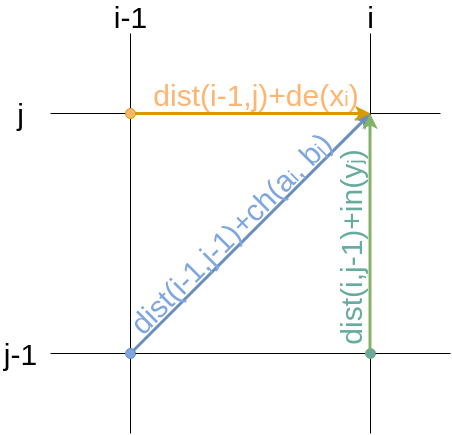

In [0]:
def edit_dist(a, b):
  """
  Find Leenshtein distance between two text strings: a and b
  """
  penalties = floyd_warshall()
  if len(a) > len(b):
    a, b = b, a
  dist = zeros((len(a) + 1, len(b) + 1))
  for j in range(1, len(b) + 1):
    dist[0][j] = dist[0][j - 1] + penalties[letter_index('#')][letter_index(b[j - 1])]
  for i in range(1, len(a) + 1):
    dist[i][0] = dist[i - 1][0] + penalties[letter_index(b[i - 1])][letter_index('#')]
    for j in range(1, len(b) + 1):
      dist[i][j] = min(dist[i - 1][j] + penalties[letter_index(a[i - 1])][letter_index('#')],
                       dist[i][j - 1] + penalties[letter_index('#')][letter_index(b[j - 1])],
                       dist[i - 1][j - 1] + penalties[letter_index(a[i - 1])][letter_index(b[j - 1])])
  return dist[len(a), len(b)]

In [7]:
edit_dist("acba", "aaab")

3.0